In [1]:
import torch
from repop import dataset,params2theta,theta2params
from matplotlib import pyplot as plt
import pandas as pd

import numpy as np
np.random.seed(42)

In [2]:
cutoff = 300
df = pd.read_csv('real_data/OD_exp.csv',header=None, names=['OD_dil','20','200','2000'])
df['OD_dil'] = df['OD_dil'].fillna(method='ffill')
OD_label = [    float(i.split('"')[1])  for i in df['OD_dil'] ]

df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(np.inf)
df.iloc[:,3] = pd.to_numeric(df.iloc[:,3], errors='coerce').fillna(0)

ks = df.to_numpy()[:,1:4]
dil_schedule = np.array((20,200,2000))#/.9



/tmp/ipykernel_7986/105950166.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
/tmp/ipykernel_7986/105950166.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(np.inf)
/tmp/ipykernel_7986/105950166.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.colum

In [3]:
cts,dils =[],[]
for k_line in ks:
    index = np.argmax(k_line <= cutoff) if np.any(ks <= cutoff) else len(ks) - 1
    cts.append( k_line[index] )
    dils.append( dil_schedule[index] )
    #print('Day ')

cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)

In [4]:
od = np.array([float(d.split('"')[1]) for d in df['OD_dil']])

In [5]:
data =  dataset(cts[od!=1],dils[od!=1],cutoff)

In [6]:
data.evaluate(components=int(np.sqrt(data.counts.numel())))

9
10.1210205789139 -619.5353405593786 -360.8269747492793
9.34435492308505 -617.7930665979106 -287.93267211684156
8.75511927709365 -618.0296221702083 -230.53768852387714
8.317278024362873 -617.7164694260105 -188.01126227848283
7.965844864421034 -618.0806316144798 -154.2940264679694
7.743709188595057 -618.7452998909448 -132.21368837846057
7.558330012612319 -618.5617444383076 -114.42838415735976
7.411255630828838 -618.5778621636689 -100.17803539020532
7.306154852649273 -619.0128155617524 -89.58772990225809
7.211647203360414 -618.7341376389084 -80.71206842336655
7.137293664732282 -618.3315249023948 -73.92663855185936
7.089321427873962 -618.3682170346812 -69.26089809585334
7.059897843247261 -618.5831355372452 -66.20394866091603
7.040174814674105 -618.7223258496965 -64.15889138811097
7.02651113707746 -618.7812359113022 -62.77929563476689
7.016805048671405 -618.783885924254 -61.838239815764844
7.009713637965766 -618.7483463903009 -61.18797183097879
7.00440003756657 -618.6939598356428 -60.7283

(tensor([5.7295e+03, 2.9928e+04, 2.5169e+03, 4.3175e+03, 9.9777e+03, 1.3742e+03,
         9.3894e+02, 1.9106e+02, 1.2037e+00], device='cuda:0',
        dtype=torch.float64),
 tensor([9.6912e+02, 4.6456e+03, 4.8185e+02, 1.3899e+03, 3.9454e+03, 3.4823e+02,
         3.3832e+02, 5.4552e+01, 5.7929e-01], device='cuda:0',
        dtype=torch.float64),
 tensor([0.2388, 0.2074, 0.1502, 0.1328, 0.1111, 0.0795, 0.0516, 0.0193, 0.0093],
        device='cuda:0', dtype=torch.float64))

/home/pessoa/Codes/CElegans-Plate/repop.py:322: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks() * bins[-1]).astype(int))


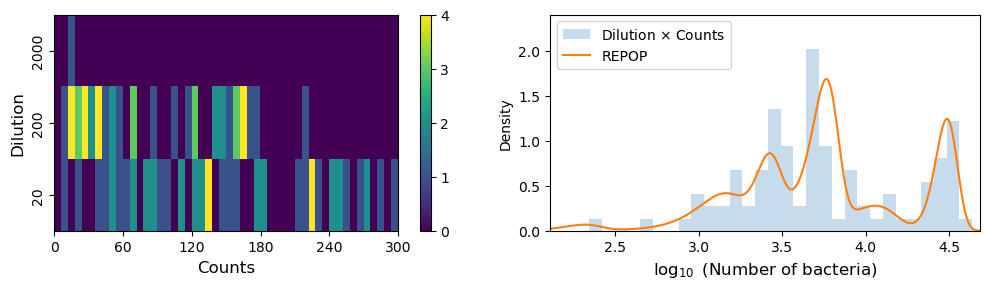

In [7]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
data.dil_imshow(ax[0],fig)
data.log_plots(ax[1])
plt.tight_layout()
ax[1].legend()
xlim = ax[1].get_xlim()
ax[1].set_ylim(0,2.4)

plt.savefig('graphs/3dils.png',dpi=500)

In [8]:
from synth_data import cases

#make a case with the 3 higher probability peaks
m,s,r = [d[:4].cpu() for d in data.ev]
r=r/r.sum()
cs = cases.case(m.numpy(),s.numpy(),r.numpy(),'Case redone')

In [9]:
cts,dils = cs.sample_data(size=200)

In [10]:
data_synth =  dataset(cts,dils,300)
data_synth.evaluate()

14
7.781661454885914 -1154.5592751042475 -400.5317380111241
7.3681231571914285 -1157.2405908349726 -315.70824510426564
7.06487004082709 -1156.3796935874805 -256.066948831957
6.862024579027874 -1158.1804757251884 -213.8524023592035
6.732351581094133 -1157.5731397913028 -188.68900905129468
6.638514158279056 -1157.5471744056695 -169.98696136709628
6.563415804639469 -1157.620598460016 -154.92831598558496
6.502916779108837 -1157.701088111481 -142.7746337752278
6.455015418519718 -1157.7743436461092 -133.14424510788632
6.417530387334074 -1157.808378806405 -125.63177257642192
6.388415691063824 -1157.8351805388265 -119.79702215923135
6.365987860393454 -1157.8391249961244 -115.31930550113617
6.348788319492906 -1157.8298543033613 -111.89786020823938
6.33565240566349 -1157.8191200884346 -109.28852992403026
6.325653217073991 -1157.8122076635145 -107.3010858659613
6.31806848354616 -1157.8116621351328 -105.78890455531891
6.312345534917588 -1157.8191167899804 -104.64012684180594
6.308084330680912 -115

(tensor([5.6465e+03, 5.6014e+03, 3.1132e+03, 2.3752e+03, 5.3665e+03, 5.2556e+03,
         2.9240e+04, 2.9432e+04, 2.9504e+04, 2.9507e+04, 2.9457e+04, 2.8059e+03,
         2.9273e+04, 3.6214e+00], device='cuda:0', dtype=torch.float64),
 tensor([1.1196e+03, 1.1595e+03, 5.3489e+02, 2.6173e+02, 1.2133e+03, 1.2178e+03,
         4.4136e+03, 4.5999e+03, 4.7584e+03, 4.9131e+03, 5.0775e+03, 5.3966e+02,
         5.4562e+03, 1.8556e+00], device='cuda:0', dtype=torch.float64),
 tensor([0.1654, 0.1459, 0.1139, 0.1025, 0.0986, 0.0859, 0.0614, 0.0530, 0.0455,
         0.0388, 0.0327, 0.0299, 0.0223, 0.0044], device='cuda:0',
        dtype=torch.float64))

/home/pessoa/Codes/CElegans-Plate/repop.py:322: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks() * bins[-1]).astype(int))


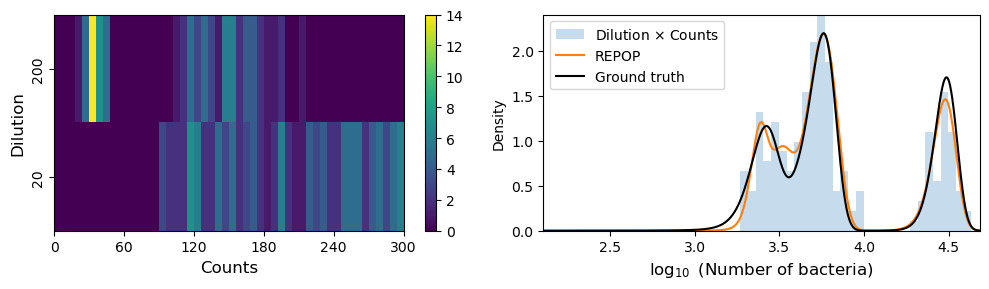

In [11]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
data_synth.dil_imshow(ax[0],fig)
data_synth.log_plots(ax[1],params2theta(m,s,r))

ax[1].set_xlim(xlim)
plt.tight_layout()
ax[1].legend()
ax[1].set_ylim(0,2.4)

plt.savefig('graphs/3dils_synth.png',dpi=500)

In [12]:
data.ev

(tensor([5.7295e+03, 2.9928e+04, 2.5169e+03, 4.3175e+03, 9.9777e+03, 1.3742e+03,
         9.3894e+02, 1.9106e+02, 1.2037e+00], device='cuda:0',
        dtype=torch.float64),
 tensor([9.6912e+02, 4.6456e+03, 4.8185e+02, 1.3899e+03, 3.9454e+03, 3.4823e+02,
         3.3832e+02, 5.4552e+01, 5.7929e-01], device='cuda:0',
        dtype=torch.float64),
 tensor([0.2388, 0.2074, 0.1502, 0.1328, 0.1111, 0.0795, 0.0516, 0.0193, 0.0093],
        device='cuda:0', dtype=torch.float64))